In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

from utils.dataloader import load_data_npy, DataGenerator
from utils.model_utils import load_model_and_history, load_test_results

In [4]:
model_names = {
    'model_base_cnn': 'Modelo Base',
    'model_extended_cnn': 'Modelo Avanzado',
    'tuned_model': 'Hyperparameter Tuning',
}

models = {}

for model_id, description in model_names.items():
    model, history = load_model_and_history(model_id)
    test_loss, test_accuracy = load_test_results(model_id)
    models[model_id] = {
        'model': model,
        'history': history,
        'description': description,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    }

Modelo y historial cargados desde 'models/model_base_cnn'


Modelo y historial cargados desde 'models/model_extended_cnn'


Modelo y historial cargados desde 'models/tuned_model'


In [ ]:
# Historias de validación por modelo
model_base, history_base = load_model_and_history('model_base_cnn')
model_extended, history_extended = load_model_and_history('model_extended_cnn')
model_tuned, history_tuned = load_model_and_history('tuned_model')
#_, val_tuning = load_history('models/load_model_and_history')
#_, val_transfer = load_history('models/modelo_transfer_learning_history.json')
#_, val_augmented = load_history('models/modelo_data_augmentation_history.json')

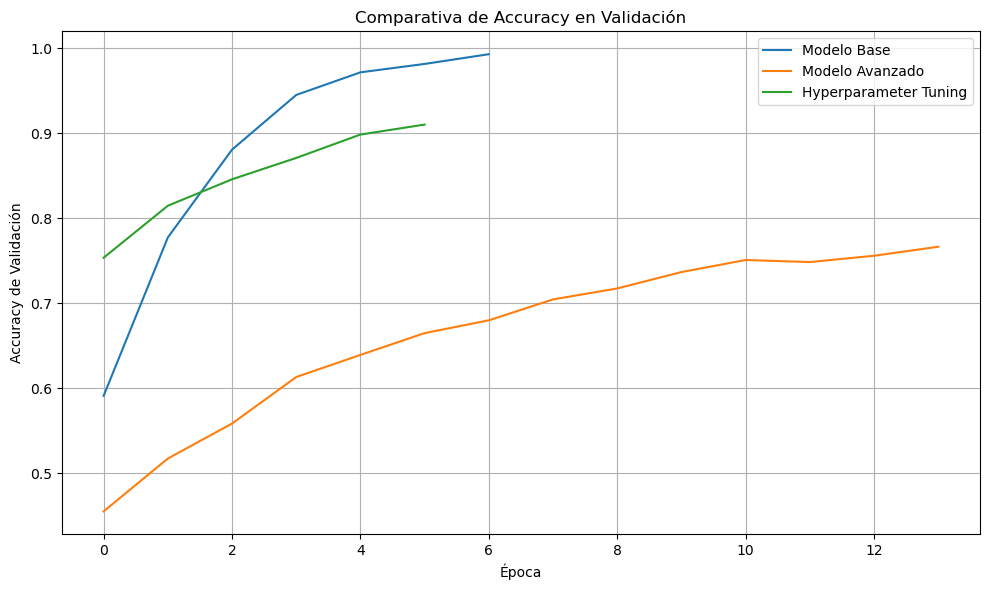

In [10]:
# Crear gráfica
plt.figure(figsize=(10, 6))
for model_id, content in models.items():
    val_acc = content['history']['accuracy']
    plt.plot(val_acc, label=content['description'])

plt.xlabel("Época")
plt.ylabel("Accuracy de Validación")
plt.title("Comparativa de Accuracy en Validación")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
_, _, _, _, images_test, categories_test = load_data_npy()

print(f"Test: {images_test.shape}")

In [11]:
# Evaluar todos los modelos y almacenar los resultados
results = []
results = []
for model_id, model_data in models.items():
    #test_loss, test_acc = model_data["model"].evaluate(images_test, categories_test, verbose=0)
    results.append({"Model_Name": model_data["description"], "Test_Accuracy": model_data["test_accuracy"]})

# Crear DataFrame
df = pd.DataFrame(results)

# Mostrar tabla con gradiente en la columna Test_Accuracy
df.style\
  .hide(axis="index")\
  .background_gradient(subset=['Test_Accuracy'], cmap='coolwarm')\
  .format({'Test_Accuracy': '{:.6f}'})\
  .set_properties(subset=['Model_Name'], **{'text-align': 'left'})\
  .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

Model_Name,Test_Accuracy
Modelo Base,0.738700
Modelo Avanzado,0.814000
Hyperparameter Tuning,0.894000
